In [ ]:
import pandas as pd

df= pd.read_csv('energy-data-filtered.csv') 
df['year'] = pd.to_datetime(df['year'], format='%Y-%m-%d')
df.set_index('year', inplace=True)
df.head(20)

,country,electricity_generation,renewables_electricity,fossil_electricity,electricity_demand
year,,,,,
2000-01-01,Africa,441.08,77.50,350.57,454.15
2001-01-01,Africa,459.46,83.31,365.43,462.61
2002-01-01,Africa,487.69,88.02,387.68,489.33
2003-01-01,Africa,509.14,85.87,410.61,510.48
2004-01-01,Africa,540.14,91.01,435.76,541.50
2005-01-01,Africa,560.75,93.95,455.51,562.31
2006-01-01,Africa,586.80,97.98,478.79,590.37
2007-01-01,Africa,610.23,100.50,498.41,614.60
2008-01-01,Africa,621.69,102.50,506.19,626.12


In [53]:
df.shape

(233, 5)

In [54]:
unique_values = set(df['country'])
print(unique_values)

{'Asia', 'Croatia', 'Algeria', 'Argentina', 'Colombia', 'Germany', 'Brazil', 'Africa', 'China'}


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 233 entries, 2000-01-01 to 2023-01-01
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 233 non-null    object 
 1   electricity_generation  233 non-null    float64
 2   renewables_electricity  233 non-null    float64
 3   fossil_electricity      233 non-null    float64
 4   electricity_demand      233 non-null    float64
dtypes: float64(4), object(1)
memory usage: 10.9+ KB


In [56]:
df.describe()


,electricity_generation,renewables_electricity,fossil_electricity,electricity_demand
count,233.000000,233.000000,233.000000,233.000000
mean,1721.919991,376.793562,1254.221657,1724.724845
std,3364.661458,710.710075,2542.571138,3363.748699
min,8.580000,0.050000,3.040000,11.660000
25%,60.230000,19.100000,27.590000,59.800000
50%,466.170000,59.700000,98.630000,505.390000
75%,713.180000,390.530000,556.500000,726.090000
max,16216.660000,4002.080000,11447.439000,16236.229000


In [57]:
df.isnull().sum()

country                   0
electricity_generation    0
renewables_electricity    0
fossil_electricity        0
electricity_demand        0
dtype: int64

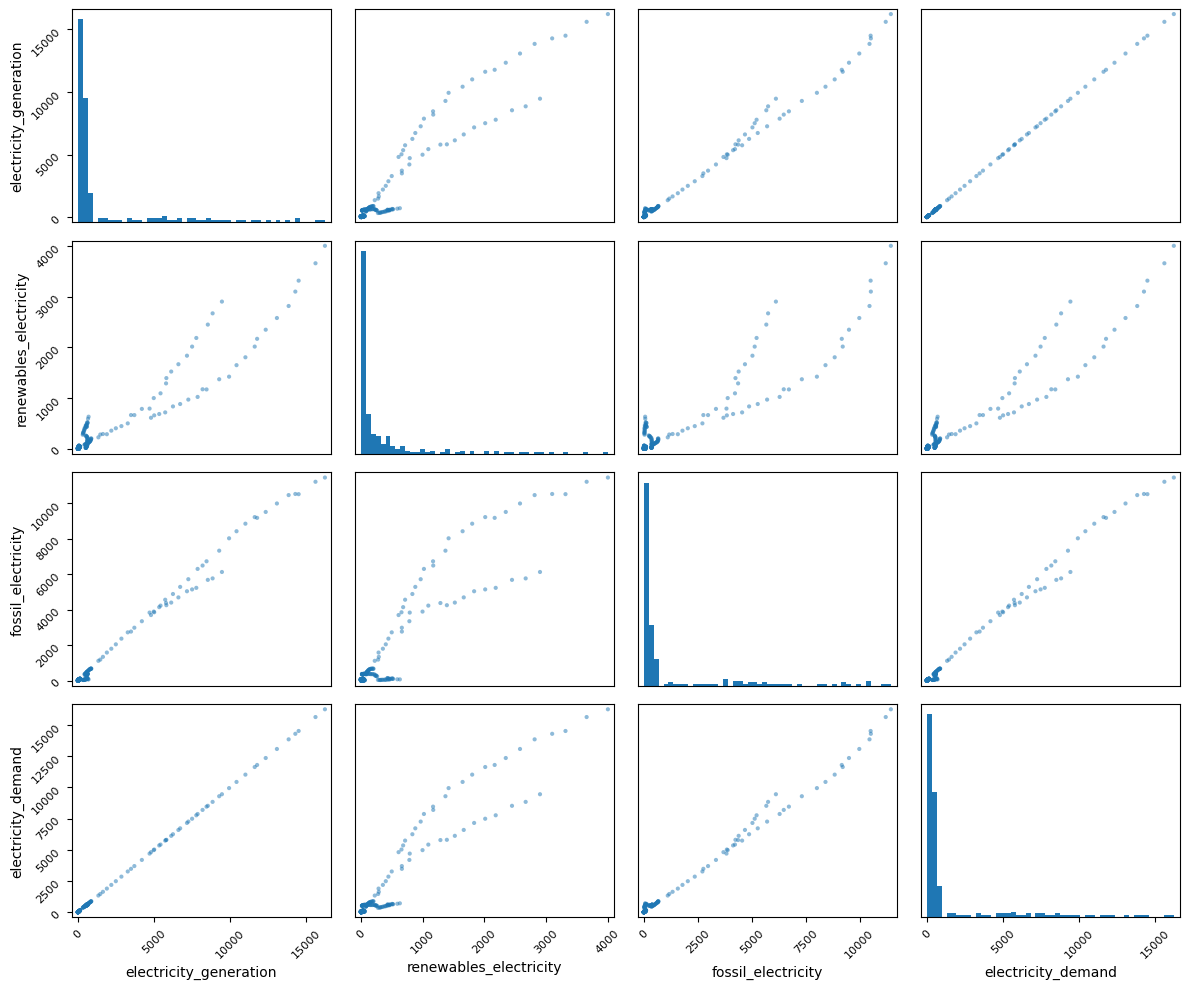

In [58]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

columns = ['country', 'electricity_generation', 'renewables_electricity', 'fossil_electricity', 'electricity_demand']

sm = scatter_matrix(df[columns], figsize=(12,10), hist_kwds={'bins': 50})

for ax in sm.ravel():
    ax.tick_params(axis='x', labelrotation=45)
    ax.tick_params(axis='y', labelrotation=45)

plt.tight_layout()
plt.show()


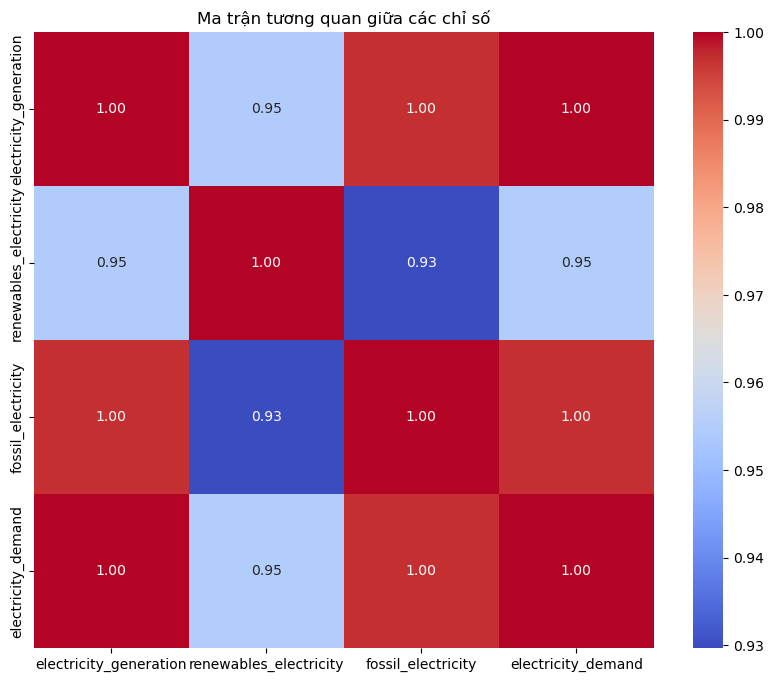

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Chọn các cột có kiểu dữ liệu số
df_numeric = df.select_dtypes(include=[float, int])

# Tính ma trận tương quan với các cột số
corr_matrix = df_numeric.corr()

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Ma trận tương quan giữa các chỉ số')
plt.show()



array([[<Axes: title={'center': 'electricity_generation'}>,
        <Axes: title={'center': 'renewables_electricity'}>],
       [<Axes: title={'center': 'fossil_electricity'}>,
        <Axes: title={'center': 'electricity_demand'}>]], dtype=object)

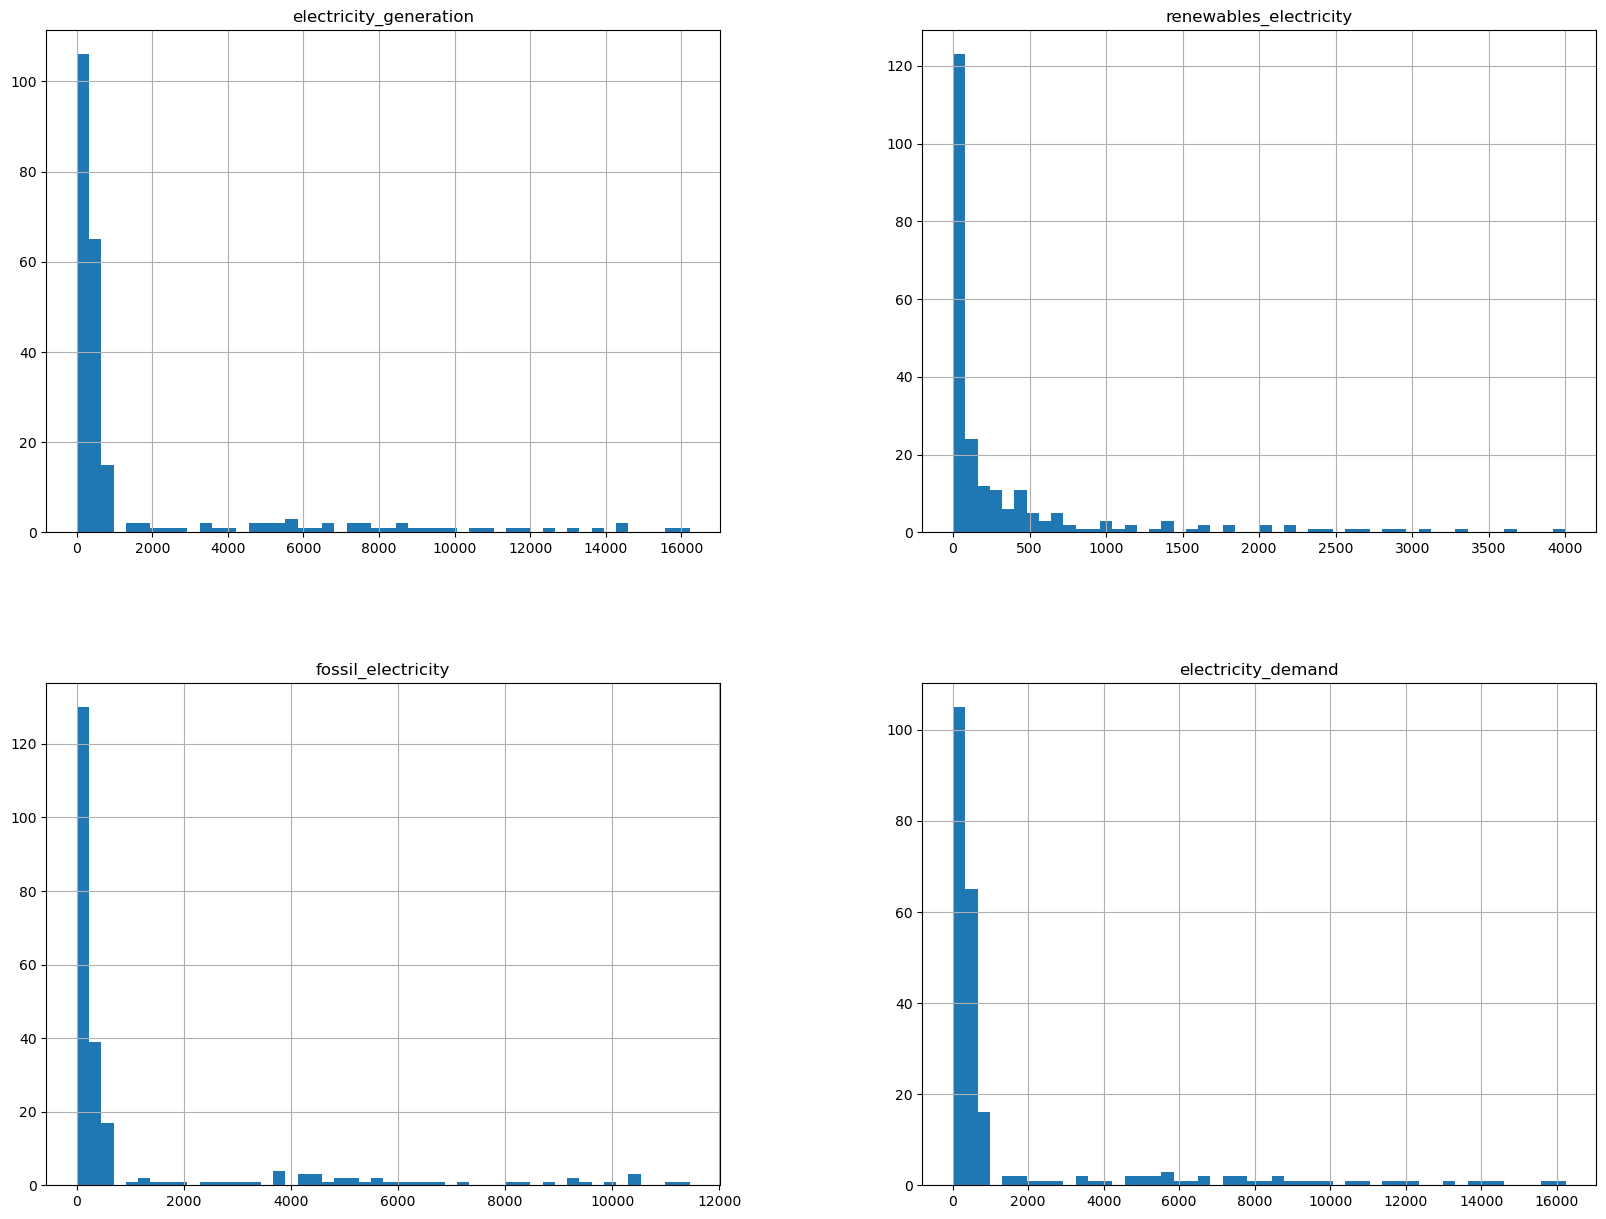

In [60]:
%matplotlib inline
from matplotlib import pyplot as plt

df.hist(bins=50, figsize=(20, 15))

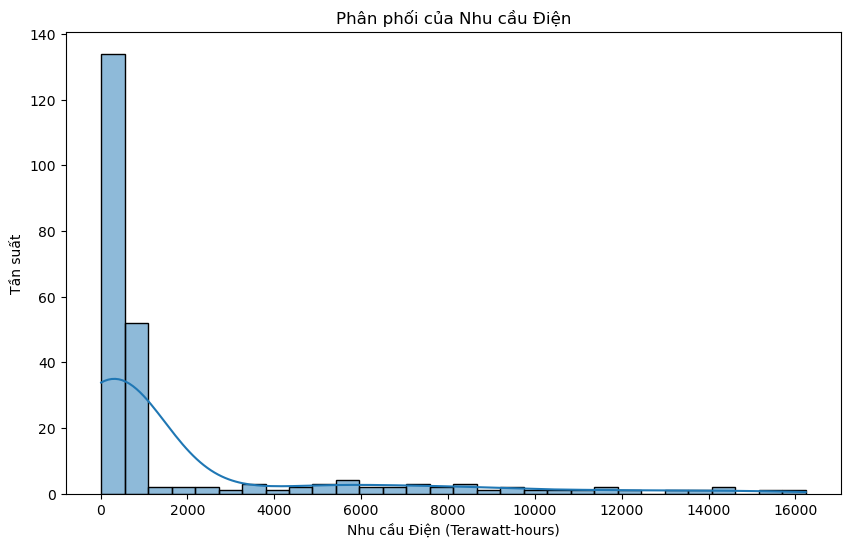

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Biểu đồ phân phối của electricity_demand
plt.figure(figsize=(10,6))
sns.histplot(df['electricity_demand'], kde=True, bins=30)
plt.title('Phân phối của Nhu cầu Điện')
plt.xlabel('Nhu cầu Điện (Terawatt-hours)')
plt.ylabel('Tần suất')
plt.show()


In [62]:
missing_values = df.isnull().sum()

missing_percentage = (df.isnull().mean()) * 100

missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data)


                        Missing Values  Percentage
country                              0         0.0
electricity_generation               0         0.0
renewables_electricity               0         0.0
fossil_electricity                   0         0.0
electricity_demand                   0         0.0


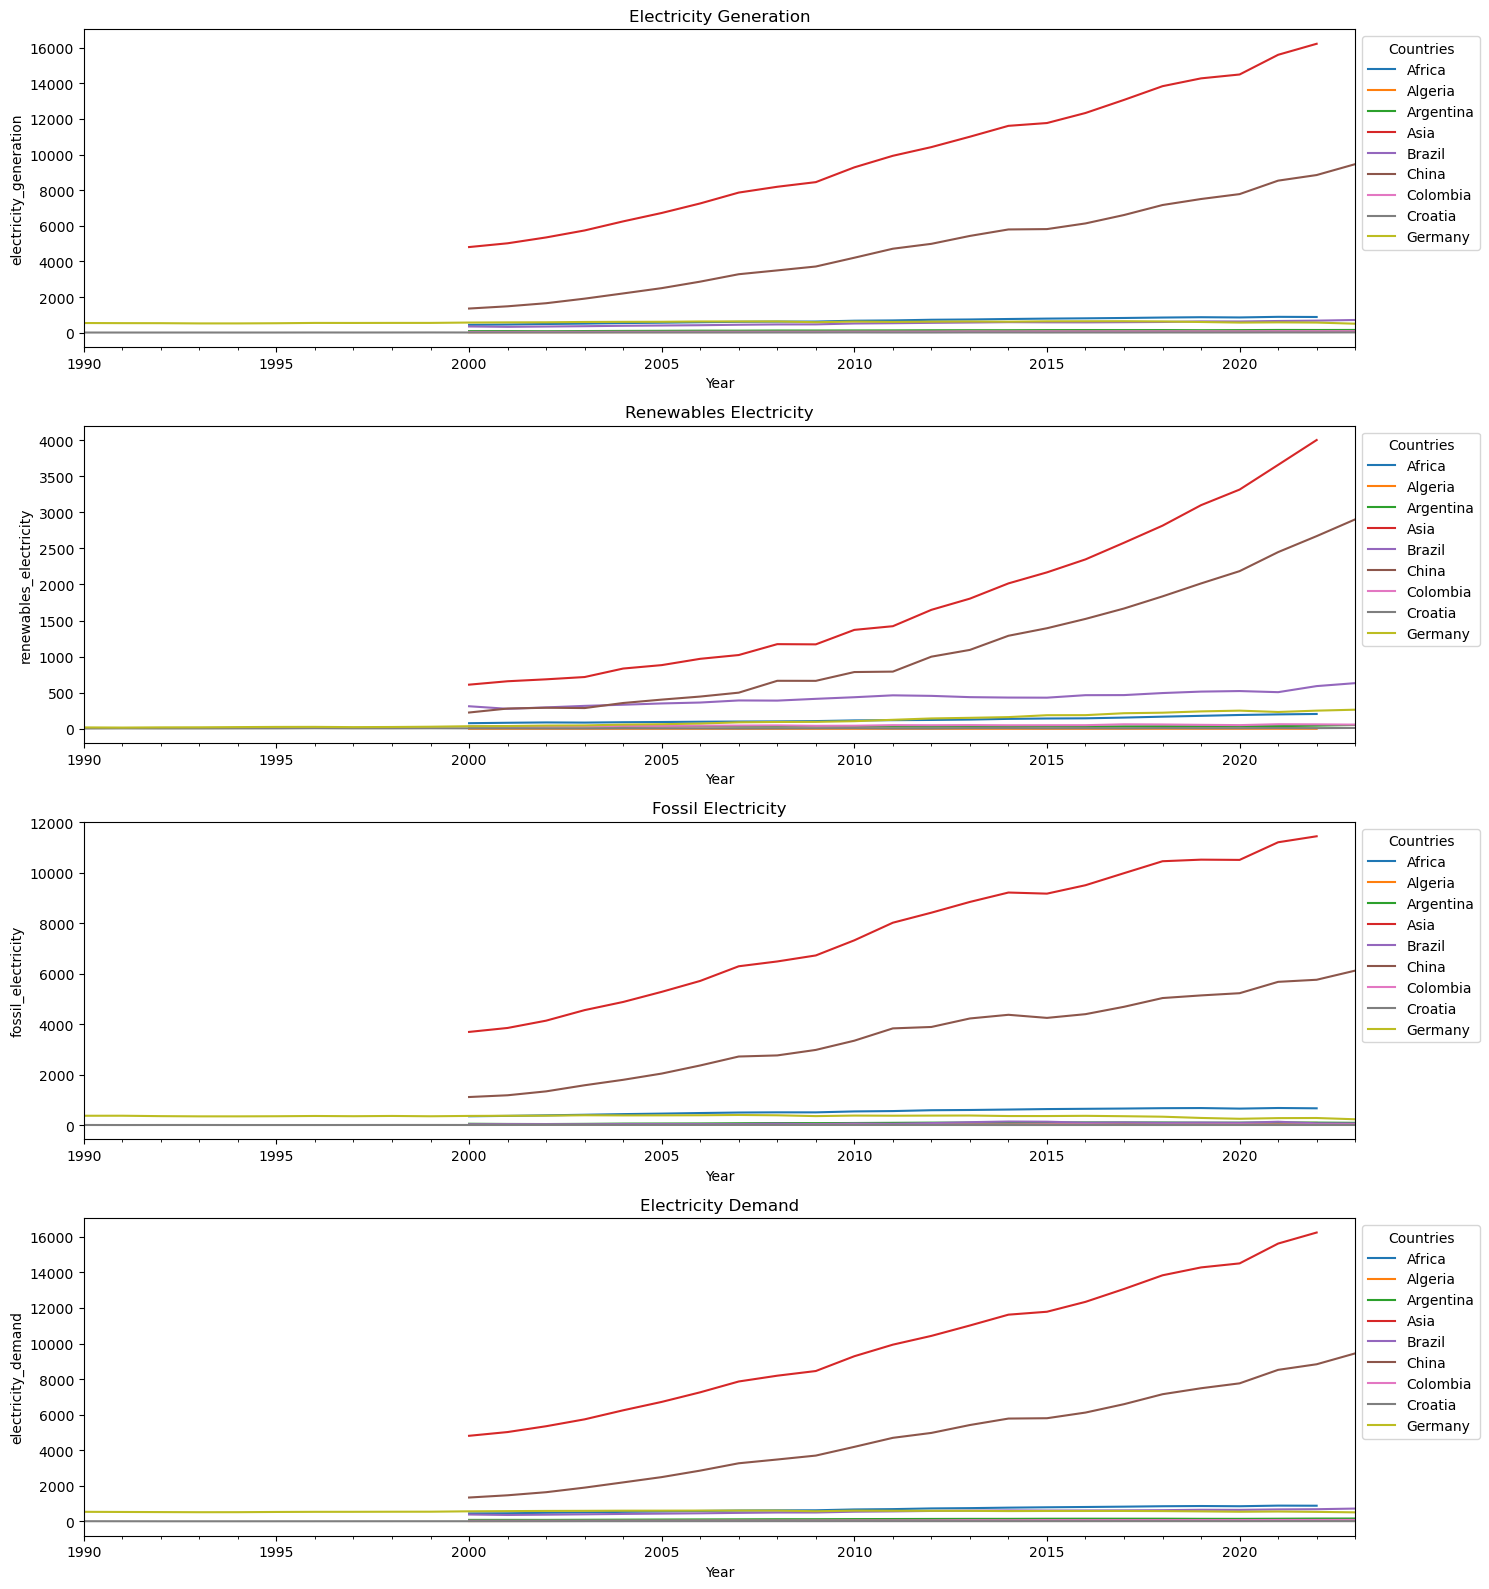

In [63]:
df = df[df.index.year >= 1965]

fig, axs = plt.subplots(4, 1, figsize=(15, 16))

columns_to_plot = ['electricity_generation', 'renewables_electricity', 'fossil_electricity', 'electricity_demand']
titles = ['Electricity Generation', 'Renewables Electricity', 'Fossil Electricity', 'Electricity Demand']

for i, column in enumerate(columns_to_plot):
    ax = axs[i]
    for country in df['country'].unique():
        df_country = df[df['country'] == country]
        df_country[column].plot(ax=ax, label=country)
    
    ax.set_title(titles[i])
    ax.set_ylabel(column)
    ax.set_xlabel('Year')
    ax.legend(title='Countries', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()
